In [1]:
# HIDDEN
import warnings
# Ignore numpy dtype warnings. These warnings are caused by an interaction
# between numpy and Cython and can be safely ignored.
# Reference: https://stackoverflow.com/a/40846742
warnings.filterwarnings("ignore", message="numpy.dtype size changed")
warnings.filterwarnings("ignore", message="numpy.ufunc size changed")

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
%matplotlib inline
import ipywidgets as widgets
from ipywidgets import interact, interactive, fixed, interact_manual
import nbinteract as nbi

sns.set()
sns.set_context('talk')
np.set_printoptions(threshold=20, precision=2, suppress=True)
pd.set_option('display.max_rows', 7)
pd.set_option('display.max_columns', 8)
pd.set_option('precision', 2)
# This option stops scientific notation for pandas
# pd.set_option('display.float_format', '{:.2f}'.format)

ModuleNotFoundError: No module named 'nbinteract'

In [2]:
# HIDDEN
def df_interact(df, nrows=7, ncols=7):
    '''
    Outputs sliders that show rows and columns of df
    '''
    def peek(row=0, col=0):
        return df.iloc[row:row + nrows, col:col + ncols]

    row_arg = (0, len(df), nrows) if len(df) > nrows else fixed(0)
    col_arg = ((0, len(df.columns), ncols)
               if len(df.columns) > ncols else fixed(0))
    
    interact(peek, row=row_arg, col=col_arg)
    print('({} rows, {} columns) total'.format(df.shape[0], df.shape[1]))

def display_df(df, rows=pd.options.display.max_rows,
               cols=pd.options.display.max_columns):
    with pd.option_context('display.max_rows', rows,
                           'display.max_columns', cols):
        display(df)

In [3]:
delays = pd.read_csv('united_summer2015.csv')
delays

,Date,Flight Number,Destination,Delay
0,6/1/15,73,HNL,257
1,6/1/15,217,EWR,28
2,6/1/15,237,STL,-3
3,6/1/15,250,SAN,0
4,6/1/15,267,PHL,64
5,6/1/15,273,SEA,-6
6,6/1/15,278,SEA,-8
7,6/1/15,292,EWR,12
8,6/1/15,300,HNL,20
9,6/1/15,317,IND,-10


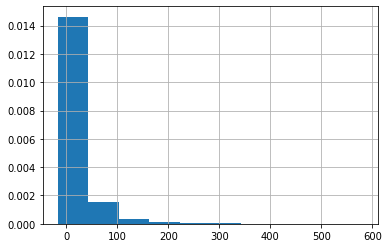

In [4]:
delays['Delay'].hist(density=True)

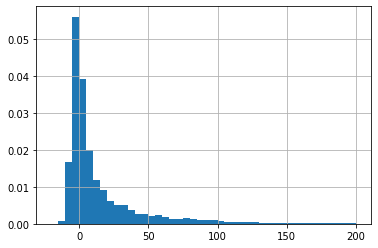

In [5]:
delays['Delay'].hist(density=True, bins=np.arange(-20, 201, 5))

In [6]:
def mse(theta, data=delays['Delay']):
    return np.mean((theta - data)**2)
mse(10)



1603.0172151898735

In [7]:
mse(15)

1561.4356600361664

In [8]:
def make_loss_df(thetas, loss_fn):
    return pd.DataFrame({
        'theta': thetas,
        loss_fn.__name__: [loss_fn(theta) for theta in thetas]
    })

In [12]:
thetas =  np.arange(0,30)
mse_vals = make_loss_df(thetas, mse)
mse_vals.head()

,theta,mse
0,0,1836.180325
1,1,1803.864014
2,2,1773.547703
3,3,1745.231392
4,4,1718.915081


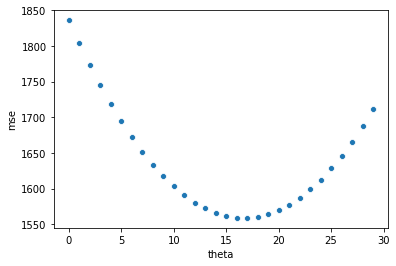

In [14]:
sns.scatterplot(x='theta', y='mse', data=mse_vals)
# on the x-axis, we have different estimates, if theta= 10, 
# then the mse of it is 1600.abs
#for every point in the plot, they are estimated by the whole dataset.

In [15]:
mse_vals.sort_values('mse')

,theta,mse
17,17,1558.803038
16,16,1559.119349
18,18,1560.486727
15,15,1561.435660
19,19,1564.170416
14,14,1565.751971
20,20,1569.854105
13,13,1572.068282
21,21,1577.537794
12,12,1580.384593


In [17]:
theta_hat_mse= np.mean(delays['Delay'])
(theta_hat_mse, mse(theta_hat_mse))#this is my optimal theta and the minimized loss, which is 1558.68.


(16.658155515370705, 1558.686180323012)

**MAE**

In [19]:
def mae(theta, data=delays['Delay']):
    return np.mean(np.abs(theta-data))

mae(10)

20.74003616636528

In [23]:
mae_vals = make_loss_df(thetas, mae)
mae_vals.head()

,theta,mae
0,0,19.535407
1,1,19.393562
2,2,19.327812
3,3,19.331501
4,4,19.394792


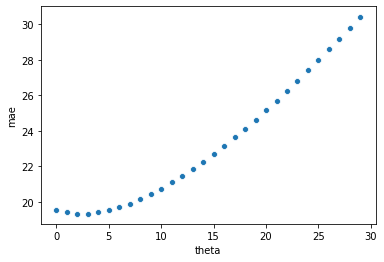

In [28]:
sns.scatterplot(x='theta',y='mae', data=mae_vals)
#The y-axis of mae is much more smaller than the one of mse;
#also, the line is increasing in roughly linear rate

In [31]:
theta_hat_mae =  np.median(delays['Delay'])
theta_hat_mae, mae(theta_hat_mae)

(2.0, 19.32781193490054)

In [32]:
theta_hat_mse, theta_hat_mae

(16.658155515370705, 2.0)

**Why they are so different?**<br>
>1. MSE<BR><BR>
if I am off, I am going to take a large penalty.
如下图所示，if we guess the value 50, mse says that the values in the tail will really hurt me because they'll be squared. <br>
This tel ls that the mean squared area will favor larger values, where larger values will result in a really large error.<br><BR>
>2. MAE<BR><BR>
    It doesn't really care about value that are really far away. If you're twice far away it'll give you twice the importance, however, the mse will give you four times the importance.
    
**直观上，我们回到mean和median的区别。<br>**
>The mean is affected by the outliners, while the median is not so affected by it, and it mostly robust to outliners.


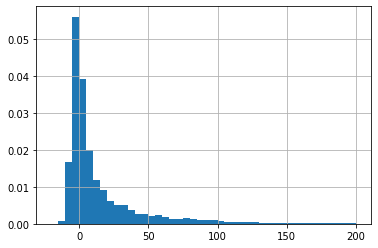

In [33]:
delays['Delay'].hist(density=True, bins=np.arange(-20, 201, 5))